In [50]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [51]:
df = pd.read_csv("./rc/rc_column_raw_data.csv", encoding="cp949")
df

,References,Specimen,b,h,a,d1,ln,ln/h,a/d1,s,s/d1,f'c,"Longi, bar along first face (Perpendicular to load)",Dl_first,"Longi, bar along second face(Perpendicular to Load)",Dl_second,"Longi, bar along middle layer (Perpendicular to Load)","Longi, bar along middle layer (Parallel to Load)",Dl_middle,fyl,rho_l,rho_l.1,Dt,fyt,rho_t,rho_t.1,ν,Vp/Vn,curvature,Failure mode,DS1,DS2,DS3,DS4,Vy,Vu,0.8Vu
0,Kokusho (1973),KO_373,200,200,500,170,500,2.50,2.94,100,0.59,20,2,16,2,16,0,0,16,524,0.0198,1.98,7,351,0.003318,0.3318,0.19,0.9751,Single,FS,0.0028,0.0056,0.0112,0.0149,43.43,87.75,70.20
1,Kokusho (1973),KO_452,200,200,500,170,500,2.50,2.94,100,0.59,22,2,19,2,19,0,0,19,358,0.0284,2.84,7,316,0.003318,0.3318,0.45,0.8005,Single,FS,0.0019,0.0037,0.0098,0.0148,73.76,104.32,83.46
2,Kokusho (1973),KO_454,200,200,500,170,500,2.50,2.94,100,0.59,22,2,22,2,22,0,0,22,358,0.0380,3.80,7,316,0.003318,0.3318,0.45,0.8548,Single,FS,0.0025,0.0049,0.0082,0.0121,88.04,106.29,85.03
3,Yalcin (1997),BR-S1,550,550,1485,476,1485,2.70,3.12,300,0.63,45,4,25,4,25,2,2,25,445,0.0198,1.98,11,425,0.001211,0.1211,0.13,1.0430,Single,S,0.0026,0.0051,0.0097,0.0169,391.67,503.58,402.86
4,Saatcioglu et al (1989),U2,350,350,1000,305,1000,2.86,3.28,150,0.49,30,3,25,3,25,2,1,25,453,0.0321,3.21,10,470,0.002992,0.2992,0.16,0.9472,Single,FS,0.0035,0.0070,0.0228,0.0475,95.45,242.29,193.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Ikeda (1968),IK_63,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,Single,FS,0.0020,0.0040,0.0181,0.0000,61.66,64.94,51.95
213,Ikeda (1968),IK_64,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,Single,FS,0.0018,0.0036,0.0189,0.0000,58.47,63.61,50.89
214,Umemura and Endo (1970),UM_205,200,200,600,180,600,3.00,3.33,100,0.56,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.002827,0.2827,0.22,0.9966,Single,FS,0.0031,0.0062,0.0215,0.0000,55.45,66.95,53.56
215,Umemura and Endo (1970),UM_214,200,200,600,180,600,3.00,3.33,200,1.11,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.001414,0.1414,0.56,1.2503,Single,S,0.0052,0.0104,0.0171,0.0000,81.52,82.35,65.88


In [52]:
df["Failure mode"].unique()

array(['FS', 'S', 'F'], dtype=object)

In [53]:
df.loc[df["Failure mode"] == "F", "F/F-S/S"] = 0
df.loc[df["Failure mode"] == "FS", "F/F-S/S"] = 1
df.loc[df["Failure mode"] == "S", "F/F-S/S"] = 2
df

,References,Specimen,b,h,a,d1,ln,ln/h,a/d1,s,s/d1,f'c,"Longi, bar along first face (Perpendicular to load)",Dl_first,"Longi, bar along second face(Perpendicular to Load)",Dl_second,"Longi, bar along middle layer (Perpendicular to Load)","Longi, bar along middle layer (Parallel to Load)",Dl_middle,fyl,rho_l,rho_l.1,Dt,fyt,rho_t,rho_t.1,ν,Vp/Vn,curvature,Failure mode,DS1,DS2,DS3,DS4,Vy,Vu,0.8Vu,F/F-S/S
0,Kokusho (1973),KO_373,200,200,500,170,500,2.50,2.94,100,0.59,20,2,16,2,16,0,0,16,524,0.0198,1.98,7,351,0.003318,0.3318,0.19,0.9751,Single,FS,0.0028,0.0056,0.0112,0.0149,43.43,87.75,70.20,1.0
1,Kokusho (1973),KO_452,200,200,500,170,500,2.50,2.94,100,0.59,22,2,19,2,19,0,0,19,358,0.0284,2.84,7,316,0.003318,0.3318,0.45,0.8005,Single,FS,0.0019,0.0037,0.0098,0.0148,73.76,104.32,83.46,1.0
2,Kokusho (1973),KO_454,200,200,500,170,500,2.50,2.94,100,0.59,22,2,22,2,22,0,0,22,358,0.0380,3.80,7,316,0.003318,0.3318,0.45,0.8548,Single,FS,0.0025,0.0049,0.0082,0.0121,88.04,106.29,85.03,1.0
3,Yalcin (1997),BR-S1,550,550,1485,476,1485,2.70,3.12,300,0.63,45,4,25,4,25,2,2,25,445,0.0198,1.98,11,425,0.001211,0.1211,0.13,1.0430,Single,S,0.0026,0.0051,0.0097,0.0169,391.67,503.58,402.86,2.0
4,Saatcioglu et al (1989),U2,350,350,1000,305,1000,2.86,3.28,150,0.49,30,3,25,3,25,2,1,25,453,0.0321,3.21,10,470,0.002992,0.2992,0.16,0.9472,Single,FS,0.0035,0.0070,0.0228,0.0475,95.45,242.29,193.83,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Ikeda (1968),IK_63,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,Single,FS,0.0020,0.0040,0.0181,0.0000,61.66,64.94,51.95,1.0
213,Ikeda (1968),IK_64,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,Single,FS,0.0018,0.0036,0.0189,0.0000,58.47,63.61,50.89,1.0
214,Umemura and Endo (1970),UM_205,200,200,600,180,600,3.00,3.33,100,0.56,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.002827,0.2827,0.22,0.9966,Single,FS,0.0031,0.0062,0.0215,0.0000,55.45,66.95,53.56,1.0
215,Umemura and Endo (1970),UM_214,200,200,600,180,600,3.00,3.33,200,1.11,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.001414,0.1414,0.56,1.2503,Single,S,0.0052,0.0104,0.0171,0.0000,81.52,82.35,65.88,2.0


In [54]:
df.loc[df["curvature"] == "Single", 'curvature'] = 1
df.loc[df["curvature"] == "Double", 'curvature'] = 2
df

,References,Specimen,b,h,a,d1,ln,ln/h,a/d1,s,s/d1,f'c,"Longi, bar along first face (Perpendicular to load)",Dl_first,"Longi, bar along second face(Perpendicular to Load)",Dl_second,"Longi, bar along middle layer (Perpendicular to Load)","Longi, bar along middle layer (Parallel to Load)",Dl_middle,fyl,rho_l,rho_l.1,Dt,fyt,rho_t,rho_t.1,ν,Vp/Vn,curvature,Failure mode,DS1,DS2,DS3,DS4,Vy,Vu,0.8Vu,F/F-S/S
0,Kokusho (1973),KO_373,200,200,500,170,500,2.50,2.94,100,0.59,20,2,16,2,16,0,0,16,524,0.0198,1.98,7,351,0.003318,0.3318,0.19,0.9751,1,FS,0.0028,0.0056,0.0112,0.0149,43.43,87.75,70.20,1.0
1,Kokusho (1973),KO_452,200,200,500,170,500,2.50,2.94,100,0.59,22,2,19,2,19,0,0,19,358,0.0284,2.84,7,316,0.003318,0.3318,0.45,0.8005,1,FS,0.0019,0.0037,0.0098,0.0148,73.76,104.32,83.46,1.0
2,Kokusho (1973),KO_454,200,200,500,170,500,2.50,2.94,100,0.59,22,2,22,2,22,0,0,22,358,0.0380,3.80,7,316,0.003318,0.3318,0.45,0.8548,1,FS,0.0025,0.0049,0.0082,0.0121,88.04,106.29,85.03,1.0
3,Yalcin (1997),BR-S1,550,550,1485,476,1485,2.70,3.12,300,0.63,45,4,25,4,25,2,2,25,445,0.0198,1.98,11,425,0.001211,0.1211,0.13,1.0430,1,S,0.0026,0.0051,0.0097,0.0169,391.67,503.58,402.86,2.0
4,Saatcioglu et al (1989),U2,350,350,1000,305,1000,2.86,3.28,150,0.49,30,3,25,3,25,2,1,25,453,0.0321,3.21,10,470,0.002992,0.2992,0.16,0.9472,1,FS,0.0035,0.0070,0.0228,0.0475,95.45,242.29,193.83,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Ikeda (1968),IK_63,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,FS,0.0020,0.0040,0.0181,0.0000,61.66,64.94,51.95,1.0
213,Ikeda (1968),IK_64,200,200,500,173,500,2.50,2.89,100,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,FS,0.0018,0.0036,0.0189,0.0000,58.47,63.61,50.89,1.0
214,Umemura and Endo (1970),UM_205,200,200,600,180,600,3.00,3.33,100,0.56,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.002827,0.2827,0.22,0.9966,1,FS,0.0031,0.0062,0.0215,0.0000,55.45,66.95,53.56,1.0
215,Umemura and Endo (1970),UM_214,200,200,600,180,600,3.00,3.33,200,1.11,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.001414,0.1414,0.56,1.2503,1,S,0.0052,0.0104,0.0171,0.0000,81.52,82.35,65.88,2.0


In [55]:
col_lst = df.columns.to_list()
drop_lst = ['References','Specimen','b','h','a','d1','ln','ln/h', 's', 'DS1', 'DS2', 'DS3', 'DS4', "Failure mode"]
col_lst

['References',
 'Specimen',
 'b',
 'h',
 'a',
 'd1',
 'ln',
 'ln/h',
 'a/d1',
 's',
 's/d1',
 "f'c",
 'Longi, bar along first face (Perpendicular to load)',
 'Dl_first',
 'Longi, bar along second face(Perpendicular to Load)',
 'Dl_second',
 'Longi, bar along middle layer (Perpendicular to Load)',
 'Longi, bar along middle layer (Parallel  to Load)',
 'Dl_middle',
 'fyl',
 'rho_l',
 'rho_l.1',
 'Dt',
 'fyt',
 'rho_t',
 'rho_t.1',
 'ν',
 'Vp/Vn',
 'curvature',
 'Failure mode',
 'DS1',
 'DS2',
 'DS3',
 'DS4',
 'Vy',
 'Vu',
 '0.8Vu',
 'F/F-S/S']

In [56]:
target_df = df["F/F-S/S"].copy()
para_df = df.drop(drop_lst, axis=1).copy()
para_df

,a/d1,s/d1,f'c,"Longi, bar along first face (Perpendicular to load)",Dl_first,"Longi, bar along second face(Perpendicular to Load)",Dl_second,"Longi, bar along middle layer (Perpendicular to Load)","Longi, bar along middle layer (Parallel to Load)",Dl_middle,fyl,rho_l,rho_l.1,Dt,fyt,rho_t,rho_t.1,ν,Vp/Vn,curvature,Vy,Vu,0.8Vu,F/F-S/S
0,2.94,0.59,20,2,16,2,16,0,0,16,524,0.0198,1.98,7,351,0.003318,0.3318,0.19,0.9751,1,43.43,87.75,70.20,1.0
1,2.94,0.59,22,2,19,2,19,0,0,19,358,0.0284,2.84,7,316,0.003318,0.3318,0.45,0.8005,1,73.76,104.32,83.46,1.0
2,2.94,0.59,22,2,22,2,22,0,0,22,358,0.0380,3.80,7,316,0.003318,0.3318,0.45,0.8548,1,88.04,106.29,85.03,1.0
3,3.12,0.63,45,4,25,4,25,2,2,25,445,0.0198,1.98,11,425,0.001211,0.1211,0.13,1.0430,1,391.67,503.58,402.86,2.0
4,3.28,0.49,30,3,25,3,25,2,1,25,453,0.0321,3.21,10,470,0.002992,0.2992,0.16,0.9472,1,95.45,242.29,193.83,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2.89,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,61.66,64.94,51.95,1.0
213,2.89,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,58.47,63.61,50.89,1.0
214,3.33,0.56,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.002827,0.2827,0.22,0.9966,1,55.45,66.95,53.56,1.0
215,3.33,1.11,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.001414,0.1414,0.56,1.2503,1,81.52,82.35,65.88,2.0


## 피어슨 상관관계(Pearson correlation)

<Figure size 1080x720 with 0 Axes>

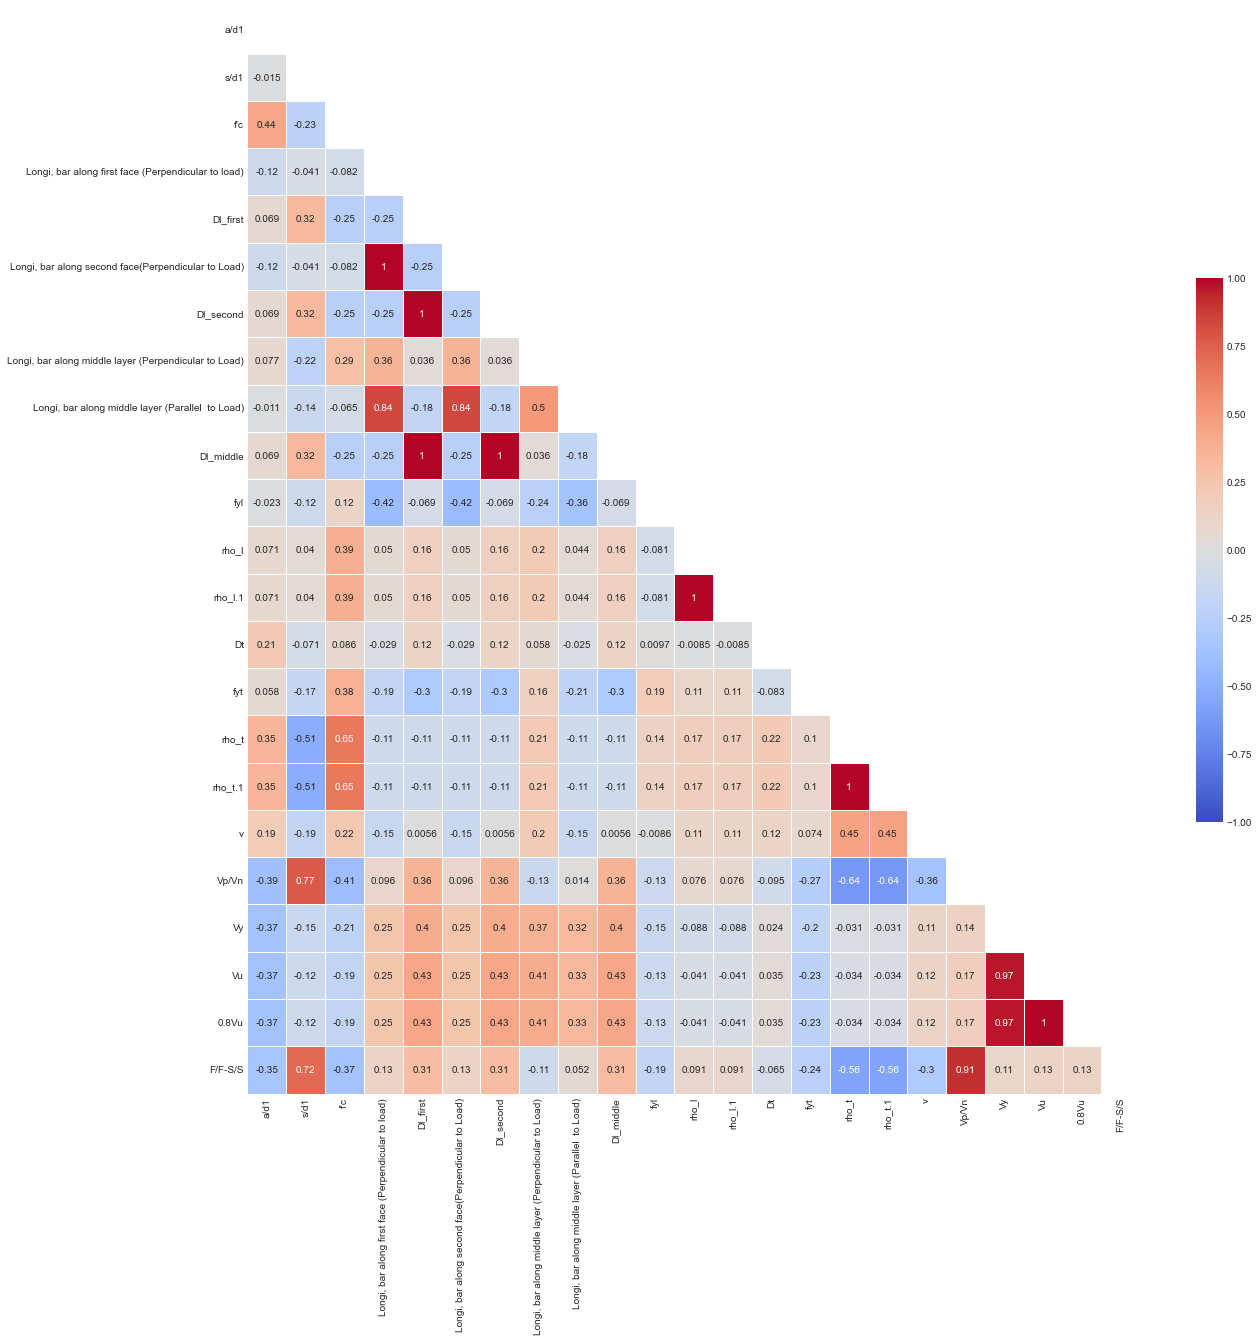

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
corr = para_df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(20,20) )

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            cmap = 'coolwarm',
            annot = True,   # 실제 값을 표시
            mask=mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1 # 컬러바 범위 -1 ~ 1)
            )
plt.show()

## Mutual Information
* random variable이 얼마나 Mutual dependence 한지를 측정하는 방법

In [58]:
para_df

,a/d1,s/d1,f'c,"Longi, bar along first face (Perpendicular to load)",Dl_first,"Longi, bar along second face(Perpendicular to Load)",Dl_second,"Longi, bar along middle layer (Perpendicular to Load)","Longi, bar along middle layer (Parallel to Load)",Dl_middle,fyl,rho_l,rho_l.1,Dt,fyt,rho_t,rho_t.1,ν,Vp/Vn,curvature,Vy,Vu,0.8Vu,F/F-S/S
0,2.94,0.59,20,2,16,2,16,0,0,16,524,0.0198,1.98,7,351,0.003318,0.3318,0.19,0.9751,1,43.43,87.75,70.20,1.0
1,2.94,0.59,22,2,19,2,19,0,0,19,358,0.0284,2.84,7,316,0.003318,0.3318,0.45,0.8005,1,73.76,104.32,83.46,1.0
2,2.94,0.59,22,2,22,2,22,0,0,22,358,0.0380,3.80,7,316,0.003318,0.3318,0.45,0.8548,1,88.04,106.29,85.03,1.0
3,3.12,0.63,45,4,25,4,25,2,2,25,445,0.0198,1.98,11,425,0.001211,0.1211,0.13,1.0430,1,391.67,503.58,402.86,2.0
4,3.28,0.49,30,3,25,3,25,2,1,25,453,0.0321,3.21,10,470,0.002992,0.2992,0.16,0.9472,1,95.45,242.29,193.83,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2.89,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,61.66,64.94,51.95,1.0
213,2.89,0.58,20,5,10,5,10,0,0,10,345,0.0197,1.97,6,475,0.002827,0.2827,0.20,0.7178,1,58.47,63.61,50.89,1.0
214,3.33,0.56,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.002827,0.2827,0.22,0.9966,1,55.45,66.95,53.56,1.0
215,3.33,1.11,18,3,13,3,13,0,0,13,462,0.0199,1.99,6,324,0.001414,0.1414,0.56,1.2503,1,81.52,82.35,65.88,2.0


In [61]:
from sklearn.feature_selection import mutual_info_classif

X = para_df.drop("F/F-S/S", axis=1)
y = target_df
mu = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
mu

array([0.32150901, 0.3774909 , 0.28466167, 0.0904781 , 0.14080485,
       0.0629789 , 0.11856242, 0.        , 0.10689625, 0.1086892 ,
       0.36926827, 0.3684912 , 0.36283354, 0.1314587 , 0.48638911,
       0.46601058, 0.44836008, 0.10252724, 0.84788686, 0.05568151,
       0.10307408, 0.0568057 , 0.05657529])

Threshold(임계값)
* 이분법으로 확실하게 분류하는 기준 분류 임계값
* 현재는 0.1 기준

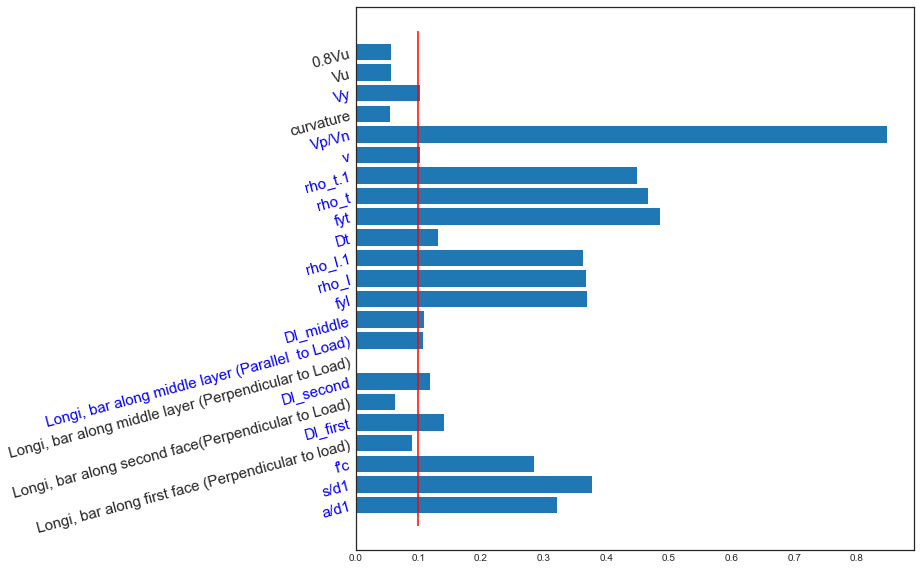

In [66]:
import matplotlib.pyplot as plt

in_var = X.columns.tolist()
fig, axes = plt.subplots( 1,1, figsize=(10,10))
pos = np.arange(len(mu))
plt.barh(pos , mu)
plt.yticks(pos , in_var)
threshold = 0.1
for idx , tick in enumerate( axes.yaxis.get_major_ticks()) :
    tick.label.set_fontsize(15)
    tick.label.set_rotation(15)
    if np.squeeze(mu)[idx] > threshold :
        tick.label.set_color("blue")

plt.vlines(x=threshold, colors="red",  ymin =-1 , ymax= len(mu))
plt.show()

## mRMR(Minimum Redundancy Maximum Relevance)